## Human Activity Recognition Using Smartphones - Decision Tree
- data set from : https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# load DataFrame from featrues.txt 
# feature index and name seperated by space in featrues.txt => sep='\s+
feature_name_df = pd.read_csv('./human_activity/features.txt', sep = '\s+', header = None, 
                              names = ['column_index', 'column_name'])

# eliminate feature index and create feature name as a list
feature_name = feature_name_df.iloc[:, 1].values.tolist()

# extract 10 samples from total of feature name
print('10 feature name samples : ', feature_name[:10])


10 feature name samples :  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


### Check if there is any duplicate existed

In [12]:
feature_dup_df = feature_name_df.groupby('column_name').count()
feature_dup_df

,column_index
column_name,
"angle(X,gravityMean)",1
"angle(Y,gravityMean)",1
"angle(Z,gravityMean)",1
"angle(tBodyAccJerkMean),gravityMean)",1
"angle(tBodyAccMean,gravity)",1
...,...
tGravityAccMag-max(),1
tGravityAccMag-mean(),1
tGravityAccMag-min(),1


In [15]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head(10)

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3
"fBodyAcc-bandsEnergy()-25,32",3
"fBodyAcc-bandsEnergy()-25,48",3
"fBodyAcc-bandsEnergy()-33,40",3
"fBodyAcc-bandsEnergy()-33,48",3


'Dupulicate name error' occured in new version of Pandas since there are duplicate feature names in the dataset
- Create the function get_new_feature_name_df() 
> add '_1(or 2)' to original feature names for duplicate one


In [25]:
# define the function : get_new_feature_name_df()
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(),
                                    columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how = 'outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0] + '_' + str(x[1])
                                                                                              if x[1] > 0 else x[0], axis = 1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)
    
    return new_feature_name_df

In [26]:
df = pd.DataFrame([['a'], ['a'], ['a'], ['b'], ['b'], ['a']], columns=['A'])
display(df)
df.groupby('A').cumcount()

,A
0,a
1,a
2,a
3,b
4,b
5,a


0    0
1    1
2    2
3    0
4    1
5    3
dtype: int64

In [27]:
# define the function : get_human_dataset( )
def get_human_dataset( ):
    
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep = '\s+',
                        header = None, names=['column_index','column_name'])
    
    # Use get_new_feature_name_df() to change the duplicate feature name. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # reconvert to list to assign the feature name as columns : tolist()
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # load dataset as DataFrame, apply feature_name for columns
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep = '\s+', names = feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep = '\s+', names = feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    # load dataset as DataFrame, apply feature_name for columns, assign column name as 'action'
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep = '\s+', header = None, names = ['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep = '\s+', header = None, names = ['action'])
    
    # return all loaded train/test DataFrame
    return X_train, X_test, y_train, y_test


In [28]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [31]:
print('## Training dataset features info()')
print(X_train.info())

## Training dataset features info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [32]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('Accuracy of Decision Tree in Prediction : {0:.4f}'.format(accuracy))

# extract hyper parameters in DecisionTreeClassifier
print('DecisionTreeClassifier basic hyper parameters :\n', dt_clf.get_params())

Accuracy of Decision Tree in Prediction : 0.8548
DecisionTreeClassifier basic hyper parameters :
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [35]:
# Use GridSearchCV to find the optimal hyper parameters 
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24], 
    'min_samples_split': [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train , y_train)
print('GridSearchCV best mean accuracy :{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV optimal hyper parameters:', grid_cv.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV best average accuracy :0.8549
GridSearchCV optimal hyper parameters: {'max_depth': 8, 'min_samples_split': 16}


In [36]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# extract the accuracy mean score, the parameter value of max_depth and Evaluation
cv_results_df[['param_max_depth', 'mean_test_score']]


,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [41]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]

# change max_depth values to calculate prediction performace for the training and test set
depth = 5
dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split=16, random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('max_depth = {0} accuracy: {1:.4f}'.format(depth , accuracy))

max_depth = 5 accuracy: 0.8385


In [42]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16, 24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV best mean of accuracy score : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV optimal hyper parameters:', grid_cv.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV best mean of accuracy score : 0.8549
GridSearchCV optimal hyper parameters: {'max_depth': 8, 'min_samples_split': 16}


In [46]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('prediction accuracy score by decision tree:{0:.4f}'.format(accuracy))

prediction accuracy score by decision tree:0.8717


In [47]:
ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_importances.sort_values(ascending = False)

tGravityAcc-min()-X                0.253354
fBodyAccJerk-bandsEnergy()-1,16    0.212584
angle(Y,gravityMean)               0.139001
fBodyAccMag-energy()               0.115478
tGravityAcc-arCoeff()-Z,2          0.101885
                                     ...   
tBodyGyroJerk-correlation()-Y,Z    0.000000
tBodyGyroJerk-correlation()-X,Z    0.000000
tBodyGyroJerk-correlation()-X,Y    0.000000
tBodyGyroJerk-arCoeff()-Z,3        0.000000
fBodyAcc-sma()                     0.000000
Length: 561, dtype: float64

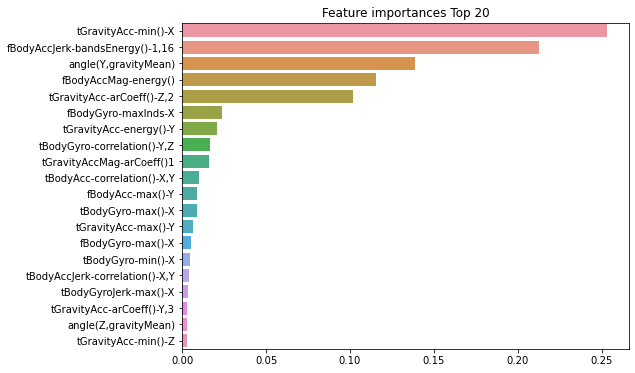

In [48]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# Sort by Top Feature Importances,and convert Series to represent bar graph in Seaborn
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns )

# Sort Series by Feature Importances 
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()